# Gaussian Proess Exercise on a CSV dataset and sampling from it later. 

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
# plt.style.use('dark_background')
import GPy

In [2]:
# print(plt.style.available)

## 1. Import the dataset

In [3]:
# Import datasets as pandas
import pandas as pd
# data_set = loadmat("Mark_4sec_CA1PSD_ISO_freqamp_020619.mat")
CA1_df = pd.read_csv("Mark_4sec_CA3PSD_ISO_freqamp_020619.csv")
CA1_df

,Stim_1,Stim_2,Xk0_1,Xk0_2,Xk0_3,Xk0_4,Xk0_5,Xk0_6,Xk0_7,Xk0_8,...,Xk1_91,Xk1_92,Xk1_93,Xk1_94,Xk1_95,Xk1_96,Xk1_97,Xk1_98,Xk1_99,Xk1_100
0,17,30,1.066899e-07,4.362881e-09,6.410145e-10,6.153980e-10,4.952555e-10,3.655776e-10,6.689563e-10,4.548710e-10,...,9.614848e-13,5.535816e-13,3.549981e-13,2.959776e-13,6.462898e-13,9.176671e-13,7.071067e-13,7.704253e-13,1.278144e-12,6.975427e-13
1,42,40,9.644295e-08,1.100460e-09,3.698362e-10,1.196834e-10,1.135362e-10,1.471786e-10,3.404247e-10,4.498116e-10,...,1.350018e-12,1.003581e-12,7.857398e-13,1.141451e-12,8.279703e-13,1.007723e-12,1.160121e-12,9.708206e-13,5.918814e-13,7.502253e-13
2,35,30,9.664707e-08,1.686739e-09,1.383835e-09,9.779574e-10,2.740501e-10,2.981321e-10,3.574340e-10,4.000314e-10,...,1.167509e-12,7.559837e-13,1.333016e-12,1.637356e-12,2.252303e-12,9.505286e-13,1.173716e-12,1.199101e-12,8.871386e-13,9.026766e-13
3,23,50,9.750570e-08,1.306145e-09,3.598379e-10,2.804073e-10,2.125693e-10,2.026804e-10,2.883272e-10,2.668982e-10,...,1.366467e-12,2.443904e-12,2.535353e-12,1.229021e-12,9.005429e-13,1.069436e-12,9.512349e-13,7.234959e-13,1.241802e-12,8.649545e-13
4,42,50,1.020247e-07,5.254584e-09,4.163858e-09,1.331331e-09,4.225174e-10,6.844851e-10,1.042377e-09,2.894596e-10,...,8.403170e-13,5.947037e-13,7.975147e-13,1.019247e-12,1.142941e-12,1.185287e-12,9.356042e-13,1.085042e-12,8.461304e-13,4.135749e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,29,40,9.438211e-08,8.953157e-10,5.325697e-10,4.034846e-10,3.847985e-10,7.124458e-10,6.019659e-10,5.045601e-10,...,3.915490e-13,3.560932e-13,3.947136e-13,3.543831e-13,5.283461e-13,2.827943e-13,3.592653e-13,4.569682e-13,3.788961e-13,4.503580e-13
380,17,50,9.503613e-08,1.012707e-09,3.889901e-10,2.982987e-10,2.975021e-10,3.704936e-10,7.720063e-10,5.561578e-10,...,3.057599e-13,3.755007e-13,3.242915e-13,2.136803e-13,2.412199e-13,2.010544e-13,2.495399e-13,5.407236e-13,3.228808e-13,3.071144e-13
381,42,30,9.467551e-08,1.790015e-09,1.131069e-09,1.480148e-09,1.404767e-09,1.095754e-09,7.758978e-10,1.129526e-09,...,5.972925e-13,7.388474e-13,4.952310e-13,4.230530e-13,3.500203e-13,3.113596e-13,4.071015e-13,6.988792e-13,6.040085e-13,3.130020e-13
382,7,50,9.344372e-08,8.772011e-10,4.970744e-10,5.333557e-10,4.927356e-10,7.601632e-10,6.495486e-10,4.785051e-10,...,2.582216e-13,2.178556e-13,1.779925e-13,2.533067e-13,1.734665e-13,1.106245e-13,1.546325e-13,3.050555e-13,3.590836e-13,3.578827e-13


In [4]:
CA1_df.describe()

,Stim_1,Stim_2,Xk0_1,Xk0_2,Xk0_3,Xk0_4,Xk0_5,Xk0_6,Xk0_7,Xk0_8,...,Xk1_91,Xk1_92,Xk1_93,Xk1_94,Xk1_95,Xk1_96,Xk1_97,Xk1_98,Xk1_99,Xk1_100
count,384.000000,384.000000,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,...,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02
mean,21.125000,25.000000,9.876748e-08,1.483792e-09,7.216810e-10,5.297563e-10,4.963279e-10,5.403563e-10,5.392557e-10,4.841397e-10,...,6.546182e-13,6.091531e-13,5.459146e-13,5.131811e-13,4.991757e-13,4.661958e-13,4.738421e-13,4.716295e-13,4.689914e-13,4.309777e-13
std,12.630313,17.100532,2.344670e-08,9.873200e-10,4.625125e-10,2.804616e-10,2.457717e-10,2.871590e-10,2.926409e-10,2.888415e-10,...,3.599384e-13,3.487042e-13,3.449344e-13,3.213658e-13,2.975148e-13,2.591702e-13,2.692950e-13,2.528458e-13,2.351999e-13,2.110681e-13
min,5.000000,0.000000,9.224978e-08,4.018869e-10,1.779852e-10,1.196834e-10,8.558949e-11,5.937738e-11,5.033034e-11,3.842182e-11,...,1.292999e-13,1.297780e-13,6.882206e-14,6.250159e-14,7.442178e-14,1.030722e-13,1.097927e-13,1.147326e-13,1.041554e-13,1.374316e-13
25%,10.000000,10.000000,9.467907e-08,7.756680e-10,3.950088e-10,3.139932e-10,3.081002e-10,3.292297e-10,3.149414e-10,2.533371e-10,...,3.921124e-13,3.629012e-13,3.203597e-13,2.946486e-13,2.972690e-13,2.745972e-13,2.990072e-13,3.003718e-13,3.096119e-13,2.838366e-13
50%,20.000000,25.000000,9.589994e-08,1.195470e-09,5.937907e-10,4.923716e-10,4.553629e-10,5.000206e-10,5.065640e-10,4.327971e-10,...,5.770754e-13,5.490138e-13,4.637024e-13,4.273831e-13,4.251277e-13,4.168663e-13,3.992897e-13,4.026246e-13,4.029964e-13,3.855960e-13
75%,30.500000,40.000000,9.758217e-08,1.902026e-09,9.339533e-10,6.661477e-10,6.518402e-10,7.017185e-10,7.320325e-10,6.748503e-10,...,8.488597e-13,7.562070e-13,6.810909e-13,6.549298e-13,6.422870e-13,5.835571e-13,5.901386e-13,5.815182e-13,5.953072e-13,5.269147e-13
max,42.000000,50.000000,4.962646e-07,6.308812e-09,4.163858e-09,2.628835e-09,1.482603e-09,1.520968e-09,1.659829e-09,1.703842e-09,...,2.595211e-12,2.443904e-12,2.535353e-12,2.213978e-12,2.458930e-12,2.006133e-12,2.530077e-12,1.943353e-12,1.592802e-12,1.795189e-12


In [5]:
# Finding the columns representing freq 32 to 50 Hz
# np.r_[0:2, 32:52]

###### 2. Finding the stimulation frequency and amplitude and pre stimulus gamma columns 

In [6]:
# gamma = np.arange(32,51)
# print(gamma)
print(CA1_df.iloc[1, np.r_[0:2, 33:52]])

Stim_1    4.200000e+01
Stim_2    4.000000e+01
Xk0_32    3.920551e-11
Xk0_33    2.185532e-11
Xk0_34    1.065976e-11
Xk0_35    1.248434e-11
Xk0_36    2.544466e-11
Xk0_37    1.974901e-11
Xk0_38    7.941763e-12
Xk0_39    1.519301e-11
Xk0_40    1.555842e-11
Xk0_41    1.090195e-11
Xk0_42    8.529903e-12
Xk0_43    7.444033e-12
Xk0_44    3.461845e-12
Xk0_45    6.004862e-12
Xk0_46    1.083304e-11
Xk0_47    7.732998e-12
Xk0_48    5.337480e-12
Xk0_49    8.791972e-12
Xk0_50    5.464634e-12
Name: 1, dtype: float64


# sum of pre stimulation gamma

data = np.sum(CA1_df.iloc[:, 33:52], axis=1)
sum_preStim_gamma = pd.DataFrame(data=data, columns=['sum_preStim_gamma'])
np.shape(sum_preStim_gamma)
sum_preStim_gamma

## 3. Select the gamma freq. stimulations

CA1_df_gamma = CA1_df[CA1_df['Stim_1']>32]
CA1_df_gamma

In [7]:
# calculate mean psd for Post Stim. Gamma, the Xk1
Y = np.sum(CA1_df.iloc[:, 133:152],axis=1)
Y = pd.DataFrame({'Y':Y})
print(np.shape(Y))
# Y.reset_index(drop=True, inplace=True)
# Y_reshape =Y[:, np.newaxis]
Y.describe()
# print(np.shape(Y_reshape))

(384, 1)


,Y
count,3.840000e+02
mean,1.305258e-09
std,1.023751e-09
min,9.442787e-11
25%,5.366985e-10
50%,9.944630e-10
75%,1.780588e-09
max,4.827246e-09


In [8]:
# Need to bring up the values to integer values. 1e-9 is too small 
Y= Y*1e10
Y.describe

<bound method NDFrame.describe of              Y
0    36.440225
1    29.521488
2    36.139207
3    16.680104
4    28.541725
..         ...
379   7.010198
380   9.871090
381  18.175107
382   8.400825
383  11.256805

[384 rows x 1 columns]>

Text(0.5, 0, 'Sum PostStim Gamma')

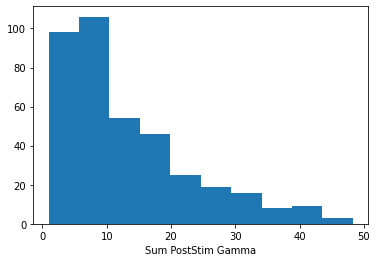

In [9]:
plt.hist(Y, bins=10)
plt.xlabel("Sum PostStim Gamma")

## 4. One dimensional GP

In [10]:
X = CA1_df.iloc[:,  0:1]
X
print(np.shape(X))

(384, 1)


In [11]:
X.head()

,Stim_1
0,17
1,42
2,35
3,23
4,42


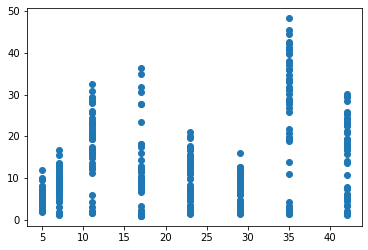

In [12]:
X.describe()
#plt.hist(X, bins=10)
plt.scatter(X,Y)

In [13]:
pow(X.std(),2)

Stim_1    159.524804
dtype: float64

In [14]:
X['Stim_1']

0      17
1      42
2      35
3      23
4      42
       ..
379    29
380    17
381    42
382     7
383    23
Name: Stim_1, Length: 384, dtype: int64

In [15]:
Y['Y']

0      36.440225
1      29.521488
2      36.139207
3      16.680104
4      28.541725
         ...    
379     7.010198
380     9.871090
381    18.175107
382     8.400825
383    11.256805
Name: Y, Length: 384, dtype: float64

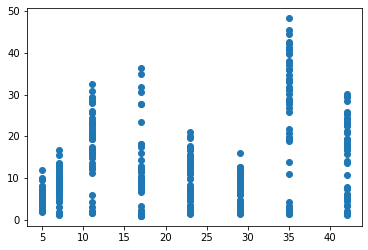

In [16]:
plt.scatter(X, Y)

## 5. Defining Kernel, initializing a GP Regression model, plotting, and optimizing 

X.reset_index(drop=True, inplace=True)
X

In [17]:
# define kernel
# ker = GPy.kern.RBF(input_dim=1, lengthscale=1)
ker = GPy.kern.Matern52(input_dim=1, variance=2., lengthscale=7., ARD=True) + GPy.kern.White(1)

In [18]:
X_reshape = X['Stim_1']
print(np.shape(X_reshape))
X_reshape = np.expand_dims(X_reshape,axis=1)
print(np.shape(X_reshape))

Y_reshape = Y['Y']
Y_reshape = np.expand_dims(Y_reshape, axis=1)
# Y_reshape =Y[:, np.newaxis]
print(np.shape(Y_reshape))

(384,)
(384, 1)
(384, 1)


In [19]:
# create simple GP model

m = GPy.models.GPRegression(X_reshape,Y_reshape,ker)
display(m)

GP_regression.,value,constraints,priors
sum.Mat52.variance,2.0,+ve,
sum.Mat52.lengthscale,7.0,+ve,
sum.white.variance,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


GP_regression.,value,constraints,priors
sum.Mat52.variance,2.0,+ve,
sum.Mat52.lengthscale,7.0,+ve,
sum.white.variance,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


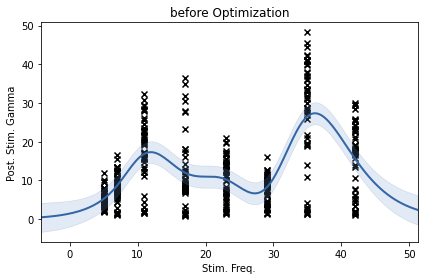

In [20]:
fig1 = m.plot(legend=False, xlabel='Stim. Freq.', ylabel='Post. Stim. Gamma',
              title="before Optimization");
display(m);
# ax = plt.gca()
# PCM = ax.get_children()[0]
# plt.colorbar(PCM, ax=ax);

In [21]:
# Constrain to positive values
# m.rbf.constrain_negative()
# display(m)
# m.kern.constrain_positive()
# m.kern.constrain_negative()

In [22]:
# optimize and plot
m.optimize(messages=True,max_f_eval = 1000);

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s17  0001   6.664642e+03   6.401967e+06 
    02s27  0015   1.362101e+03   4.770004e-01 
    03s39  0021   1.354792e+03   2.117860e-02 
    05s58  0029   1.353821e+03   1.124084e-08 
    07s82  0033   1.353821e+03   2.883698e-10 
Runtime:     07s82
Optimization status: Converged



GP_regression.,value,constraints,priors
sum.Mat52.variance,192.40216428409775,+ve,
sum.Mat52.lengthscale,7.153970122419523,+ve,
sum.white.variance,30.921355924238405,+ve,
Gaussian_noise.variance,30.921355924238405,+ve,


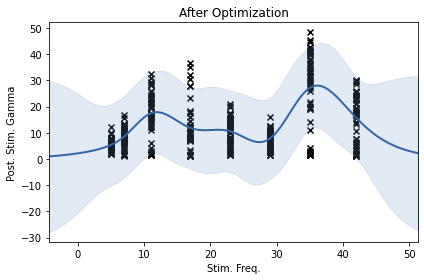

In [23]:
figure = m.plot(legend=False, xlabel='Stim. Freq.' , ylabel='Post. Stim. Gamma', title='After Optimization');
display(m)

### 5.1: sampling one Std Dev minus median

In [24]:
rand_freq_1d = np.random.choice([5,7,11,17, 23, 35, 42], size=(100))
rand_freq_1d_sorted = np.sort(rand_freq_1d)
# np.shape(rand_freq)
print(rand_freq_1d[0:10], '\n', rand_freq_1d_sorted[0:10])
rand_amp_1d = np.random.choice([10,20,30,40,50], size=(100))
rand_amp_1d_sorted = np.sort(rand_amp_1d)
print(rand_amp_1d[0:10], '\n', rand_amp_1d_sorted[0:10])
np.shape(rand_amp_1d_sorted)

[ 5  7 11 23  7  7 35 35  7 23] 
 [5 5 5 5 5 5 5 5 5 5]
[50 50 20 10 50 40 50 50 10 30] 
 [10 10 10 10 10 10 10 10 10 10]


(100,)

Text(0, 0.5, 'frequencies')

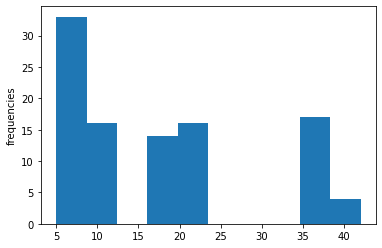

In [25]:
plt.hist(rand_freq_1d, bins=10)
plt.ylabel("frequencies")

In [26]:
# Calculate the median
# Calculate one Std Dev plus median
median_rand_freq_1d = np.median(rand_freq_1d)
print("Median rand_freq_1d: ", median_rand_freq_1d)

SD_rand_freq_1d = np.std(rand_freq_1d)
print("Std Dev of rand_freq_1d: ", SD_rand_freq_1d)

Median rand_freq_1d:  17.0
Std Dev of rand_freq_1d:  11.465007631920704


In [27]:
OneSD_minus_rand_freq_1d = np.empty((100))

OneSD_minus_rand_freq_1d[:] = int(median_rand_freq_1d - SD_rand_freq_1d)
OneSD_minus_rand_freq_1d[0]

5.0

In [28]:
testX = np.array([OneSD_minus_rand_freq_1d]) #52 , 50
print(np.shape(testX))
testX = np.transpose(testX)
print(testX[0])
np.shape(testX)

(1, 100)
[5.]


(100, 1)

In [29]:
posteriorTestY = np.empty((100))
simY  = np.empty((100))
simMse = np.empty((100))

posteriorTestY = m.posterior_samples_f(testX, full_cov=True, size=1)
# print(np.shape(m.predict(testX)))
simY, simMse = m.predict(testX)

print("mean is: \n",simY[99],"\n\n Variance is: \n", simMse[99])
# posteriorTestY
print(np.shape(posteriorTestY),'\n',posteriorTestY[:,0,0])

mean is: 
 [5.31096847] 

 Variance is: 
 [63.03480745]
(100, 1, 1) 
 [ 9.23473985e+00  6.10666028e+00  9.89016222e+00  1.43219901e+01
  8.60019938e+00  6.98309637e+00  4.35975340e+00  1.99628267e+01
 -2.38899544e+00  1.76399470e+01  9.84241160e+00 -1.77902537e+00
  1.10934356e+01  1.53936944e+01  1.11048527e+01  4.89571763e+00
  9.67893705e+00 -8.34594605e-01  2.23153375e+00  7.11862993e+00
 -2.49562207e+00 -1.45920154e+00 -3.32320768e+00  7.78428758e+00
  7.81904877e+00  8.54014275e+00  1.25923797e+01  7.39334104e+00
  3.56539254e+00  2.19067736e+00  1.97611380e+01  5.26119337e+00
  1.42054033e+01  9.39699951e+00  5.96612505e+00  2.07409025e+00
  7.58358521e+00  6.20306811e+00  2.64810118e+00  1.27461822e+01
  4.38535792e-01  9.11804260e+00  1.53915059e-01 -8.58553658e-01
  3.97426146e+00 -4.79378336e+00  3.65236861e+00  4.17326861e+00
 -9.23066930e-01  7.86570428e+00  3.15418553e+00  6.33926374e-01
  8.76622871e+00 -1.47959913e+00  2.22457166e+00 -2.79299711e+00
  1.15950828e+01  8.

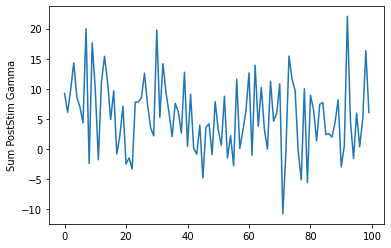

In [30]:
# plt.hist(posteriorTestY[:,0,0], bins=10)
plt.ylabel("Sum PostStim Gamma")
plt.plot(posteriorTestY[:,0,0])
plt.show()

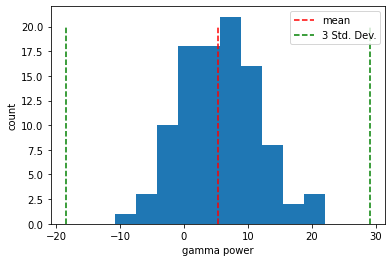

In [31]:
n, bins, patches = plt.hist(posteriorTestY[:,0,0], bins=10)
max_n = int(max(n))
plt.plot(simY[0:max_n], np.arange(0,max_n),'r--')
plt.plot(simY[0:max_n] - 3 * simMse[0:max_n] ** 0.5, np.arange(0,max_n),'--g')
plt.plot(simY[0:max_n] + 3 * simMse[0:max_n] ** 0.5, np.arange(0,max_n), '--g')
plt.ylabel("count")
plt.xlabel("gamma power")
plt.legend(["mean","3 Std. Dev."])
plt.show()

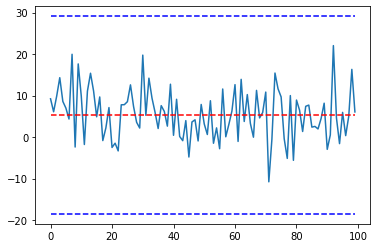

In [32]:
plt.plot(posteriorTestY[:,0,0])
plt.plot(simY, 'r--')
plt.plot(simY + 3 * simMse** 0.5, 'b--')
plt.plot(simY - 3 * simMse** 0.5, 'b--')
plt.show()

## 5.2: Sampling One SD plus median

In [33]:
OneSD_plus_rand_freq_1d = np.empty((100))

OneSD_plus_rand_freq_1d[:] = int(median_rand_freq_1d + SD_rand_freq_1d)
OneSD_plus_rand_freq_1d[0]

28.0

In [34]:
testX_plus = np.array([OneSD_plus_rand_freq_1d]) #52 , 50
print(np.shape(testX_plus))
testX_plus = np.transpose(testX_plus)
print(testX_plus[0])
np.shape(testX_plus)

(1, 100)
[28.]


(100, 1)

In [35]:
posteriorTestY_plus = np.empty((100))
simY_plus  = np.empty((100))
simMse_plus = np.empty((100))

posteriorTestY_plus = m.posterior_samples_f(testX_plus, full_cov=True, size=1)[:,0,0]
# print(np.shape(m.predict(testX)))
simY_plus, simMse_plus = m.predict(testX_plus)

print("mean is: \n",simY_plus[99],"\n\n Variance is: \n", simMse_plus[99])
# posteriorTestY
print(np.shape(posteriorTestY_plus),'\n',posteriorTestY_plus)

mean is: 
 [6.59771393] 

 Variance is: 
 [65.16284143]
(100,) 
 [ 7.42950053e+00  6.16836581e+00 -4.65297955e-01  6.28809882e+00
  2.88684696e+00  3.20076487e+00  5.40814363e+00  4.84187198e+00
  4.97325179e+00  1.71701320e+00  1.01084502e+01  2.56988107e+00
  3.91480054e+00  1.39123683e+01  8.30211465e+00  3.60922224e+00
  7.45472958e+00 -1.69275701e+00  3.27134632e+00  4.78231664e+00
  8.24262651e+00  1.03392702e+01  7.95611833e+00  1.79462553e+00
 -7.52048518e-01  2.69721145e+00 -1.63976954e+00  1.39568083e+01
  1.18186584e+01  3.31923081e-01  3.10459528e+00  8.98778628e+00
  1.01574152e+01 -1.72422514e+00  6.73396340e+00  5.76688748e+00
  1.66624957e+01 -2.73804897e+00  6.01102861e+00  2.86503309e+00
  1.30829940e+01  1.10583489e+01 -3.96092933e+00 -1.24609153e-02
  4.27527800e+00  4.15048562e+00  6.77912473e-01  5.99210765e+00
  9.15181102e-01 -4.84199922e-01  8.79668452e+00  5.33109298e+00
  1.06943014e+01  8.74782542e+00  6.89653449e+00  2.16034922e+00
  9.36911938e+00  2.49150

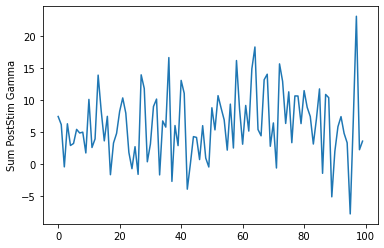

In [36]:
plt.ylabel("Sum PostStim Gamma")
plt.plot(posteriorTestY_plus)
plt.show()

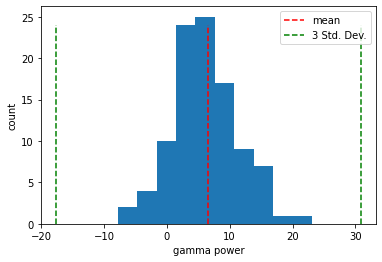

In [37]:
n, bins, patches = plt.hist(posteriorTestY_plus, bins=10)
max_n = int(max(n))
plt.plot(simY_plus[0:max_n], np.arange(0,max_n),'r--')
plt.plot(simY_plus[0:max_n] - 3 * simMse_plus[0:max_n] ** 0.5, np.arange(0,max_n),'--g')
plt.plot(simY_plus[0:max_n] + 3 * simMse_plus[0:max_n] ** 0.5, np.arange(0,max_n), '--g')
plt.ylabel("count")
plt.xlabel("gamma power")
plt.legend(["mean","3 Std. Dev."])
plt.show()

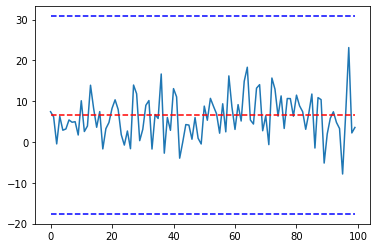

In [38]:
plt.plot(posteriorTestY_plus)
plt.plot(simY_plus, 'r--')
plt.plot(simY_plus + 3 * simMse_plus** 0.5, 'b--')
plt.plot(simY_plus - 3 * simMse_plus** 0.5, 'b--')
plt.show()

## 6. 2D GP

In [39]:
X_2d = CA1_df.iloc[:,  0:2]
X_2d
print(np.shape(X_2d))
X_2d.head()

(384, 2)


,Stim_1,Stim_2
0,17,30
1,42,40
2,35,30
3,23,50
4,42,50


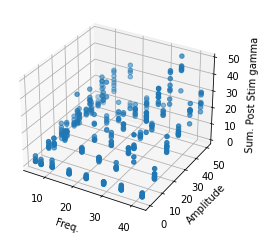

In [40]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_2d['Stim_1'],X_2d['Stim_2'], Y['Y'])
ax.set_xlabel('Freq.')
ax.set_ylabel('Amplitude')
ax.set_zlabel('Sum. Post Stim gamma');

### 6.1 Defining 2D GP model, visualizing, optimizing and re-plotting

In [41]:
ker_2d = GPy.kern.Matern52(input_dim=2, variance=3., lengthscale=2., ARD=True) + GPy.kern.White(2) #

In [42]:
# Reshaping X to match (rows, number of dimensions) format, and for Y to (rows, 1)
X_2d_reshape = X_2d[['Stim_1', 'Stim_2']]
print(np.shape(X_2d_reshape))

Y_reshape = Y['Y']
Y_reshape = np.expand_dims(Y_reshape, axis=1)
print(np.shape(Y_reshape))

(384, 2)
(384, 1)


In [43]:
m_2d = GPy.models.GPRegression(X_2d_reshape,Y_reshape,ker_2d)
display(m_2d)

GP_regression.,value,constraints,priors
sum.Mat52.variance,3.0,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


 C:\Users\sinad\anaconda3\envs\GP_env\lib\site-packages\GPy\plotting\matplot_dep\plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


GP_regression.,value,constraints,priors
sum.Mat52.variance,3.0,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


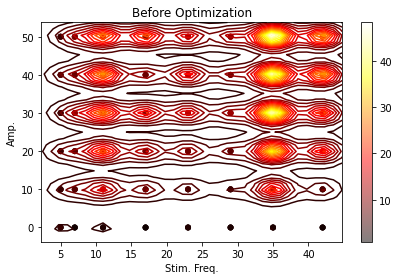

In [44]:
fig2 = m_2d.plot(legend=False, xlabel='Stim. Freq.', ylabel='Amp.', zlabel='Post. Stim. Gamma',
              title="Before Optimization");
display(m_2d);
ax = plt.gca()
PCM = ax.get_children()[0]
plt.colorbar(PCM, ax=ax);

In [45]:
# optimize and plot
m_2d.optimize(messages=True,max_f_eval = 1000);

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s19  0001   3.584623e+03   5.735294e+05 
    07s27  0017   1.122607e+03   3.013704e-01 
    09s39  0027   1.115299e+03   3.551007e-02 
    10s61  0034   1.115247e+03   6.434336e-10 
Runtime:     10s61
Optimization status: Converged



GP_regression.,value,constraints,priors
sum.Mat52.variance,266.8208619360243,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,7.364626736546105,+ve,
Gaussian_noise.variance,7.364626736546105,+ve,


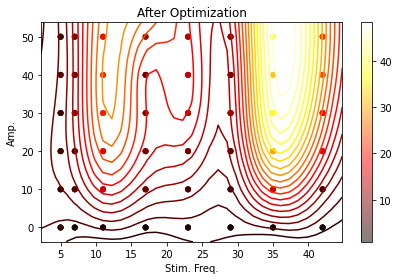

In [46]:
fig2 = m_2d.plot(legend=False, xlabel='Stim. Freq.', ylabel='Amp.', zlabel='Post. Stim. Gamma',
              title="After Optimization");
display(m_2d);
ax = plt.gca()
PCM = ax.get_children()[0]
plt.colorbar(PCM, ax=ax);

### 6.2: Sampling

### 6.2.1:  One Std Dev. plus and minus median 

In [47]:
print(rand_freq_1d_sorted,'\n',rand_amp_1d_sorted)

[ 5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 17 17 17 17 17 17 17 17 17 17 17 17 17 17 23 23 23 23 23 23 23 23 23
 23 23 23 23 23 23 23 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35
 42 42 42 42] 
 [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 40 40 40 40 40 40 40 40 40 40 40 40 40
 40 40 40 40 40 40 40 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50]


In [48]:
testX = np.array([rand_freq_1d_sorted, rand_amp_1d_sorted]) #52 , 50
print(np.shape(testX))
testX = np.transpose(testX)
print(testX[98:99,0:3])
np.shape(testX)

(2, 100)
[[42 50]]


(100, 2)

In [49]:
posteriorTestY = np.empty((100))
simY  = np.empty((100))
simMse = np.empty((100))

posteriorTestY = m_2d.posterior_samples_f(testX, full_cov=True, size=1)[:,0,0]
simY, simMse = m_2d.predict(testX)

print("mean is: \n",simY[99],"\n\n Variance is: \n", simMse[99])
print(np.shape(posteriorTestY),'\n',posteriorTestY)

mean is: 
 [25.01714606] 

 Variance is: 
 [16.30424041]
(100,) 
 [ 4.28019343  5.30972444 10.83086065  7.44797807  7.10273965  6.35561606
  7.22747874  0.65512739  5.07228212  7.52446725  2.56838684  6.88350578
  8.15975049  2.79613871  5.51868994  8.07908454 10.78615911 11.847225
  9.89907576 11.25797697 11.39801383 11.23361964 12.41749529 10.18828029
 14.79040541 14.13301123 11.48245096 13.41442339  9.86357113 13.92963116
  7.9440805  13.97039612  8.09075312 19.43357893 13.51826002 20.9529274
 15.05755838 20.47432953 14.89473501 21.75054772 16.38044511 21.5394143
 21.49286851 18.99703036 25.14040848 24.166723   29.33391881 27.24439537
 24.80906178 11.76501907 13.50694397 12.85294278 18.07163974 16.27008136
 14.34866568 16.29664134 13.98272056 11.48991059 14.50073279 11.72374747
 13.13078848 16.82941878 12.28230368 18.24108143 13.19380111 19.86186452
 18.45528933 13.93556012 18.32908813 15.67664249 10.49743968 14.18024526
 11.65276223 17.13091388 15.10943196 15.51151727 17.57414805 1

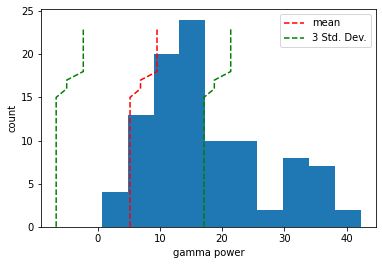

In [50]:
n, bins, patches = plt.hist(posteriorTestY, bins=10)
# print(n)
max_n = int(max(n))
plt.plot(simY[0:max_n, 0], np.arange(0,max_n),'r--')
plt.plot(simY[0:max_n, 0] - 3 * simMse[0:max_n, 0] ** 0.5, np.arange(0,max_n),'--g')
plt.plot(simY[0:max_n, 0] + 3 * simMse[0:max_n, 0] ** 0.5, np.arange(0,max_n), '--g')
plt.ylabel("count")
plt.xlabel("gamma power")
plt.legend(["mean","3 Std. Dev."])
plt.show()

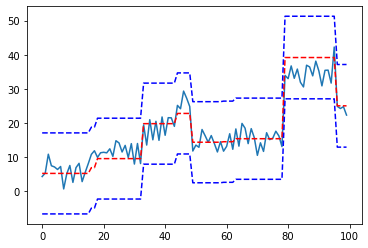

In [51]:
plt.plot(posteriorTestY)
plt.plot(simY[:, 0], 'r--')
plt.plot(simY[:, 0] + 3 * simMse[:, 0]** 0.5, 'b--')
plt.plot(simY[:, 0] - 3 * simMse[:, 0]** 0.5, 'b--')
plt.show()

### 6.2.2: Cross-section Plotting

In [52]:
# Fixing input to freq. at 17,23 and 35 to plot cross section across the 2D heatmap
slices = [0, 10, 50]
slices

[0, 10, 50]

(1, 0)
(1, 10)
(1, 50)


{'dataplot': [<matplotlib.collections.PathCollection at 0x1f610296eb0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1f6102a6430>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1f6102a6460>]}

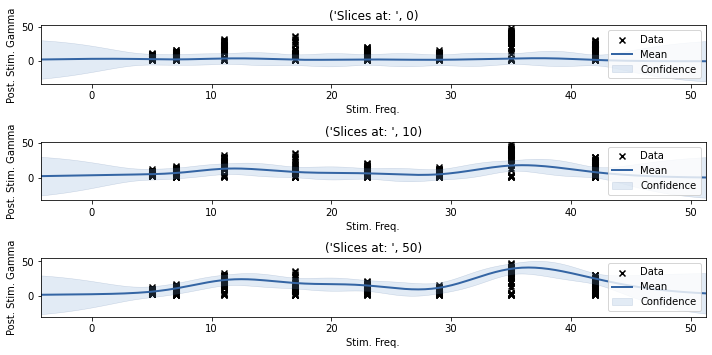

In [53]:
figure = GPy.plotting.plotting_library().figure(3, 1, figsize=(10,5))

for i, y in zip(range(3), slices):
    print((1,y));
    
    canvas = m_2d.plot(figure=figure, fixed_inputs=[(1,y)], row=(i+1), plot_data=True,
                       xlabel='Stim. Freq.', ylabel='Post. Stim. Gamma', title=("Slices at: ", y));

display(canvas);

In [54]:
slices_freq = [5, 17, 35]

(5, 1)
(17, 1)
(35, 1)


{'dataplot': [<matplotlib.collections.PathCollection at 0x1f60e027400>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1f60e0270d0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1f60e027cd0>]}

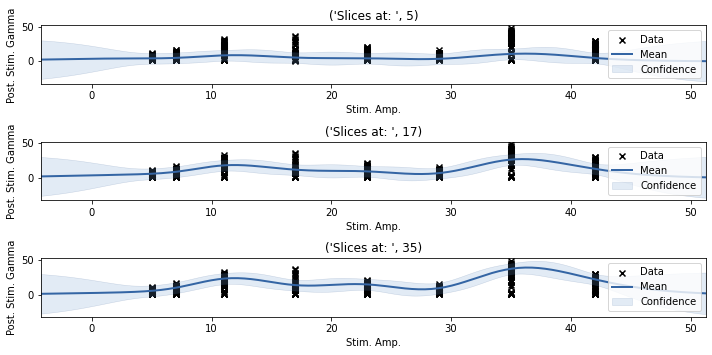

In [55]:
figure2 = GPy.plotting.plotting_library().figure(3, 1, figsize=(10,5))

for i, x in zip(range(3), slices_freq):
    print((x, 1));
    
    canvas = m_2d.plot(figure=figure2, fixed_inputs=[(1, x)], row=(i+1), plot_data=True,
                       xlabel='Stim. Amp.', ylabel='Post. Stim. Gamma', title=("Slices at: ", x));

display(canvas);